<a href="https://colab.research.google.com/github/mauricio-gomez-py/Investigacion-de-Tesis-Pregrado/blob/main/analisis_modelos_transversales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

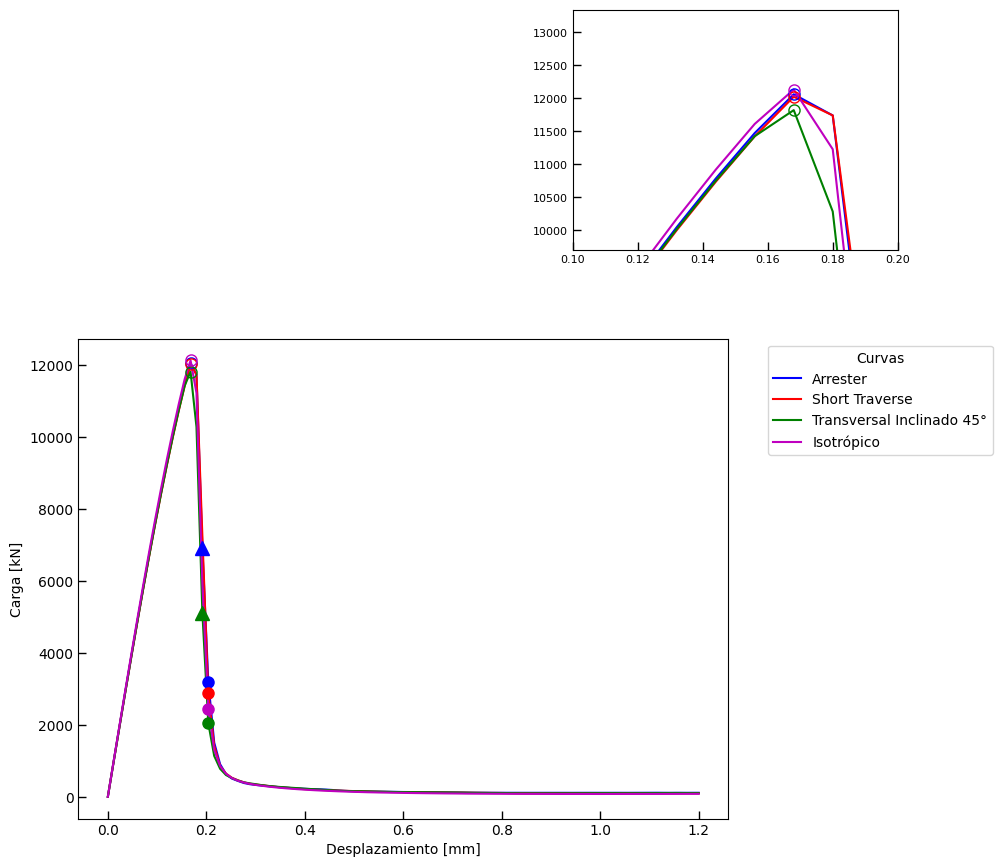

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Lee los archivos Excel
df_arrester = pd.read_excel('/content/database_modelo_arrester.xlsx')
df_short_traverse = pd.read_excel('/content/database_modelo_short_traverse.xlsx')
df_inclinado = pd.read_excel('/content/database_modelo_transversal_inclinado45.xlsx')
df_isotropico = pd.read_excel('/content/database_iso_final_homogeneo.xlsx')

# Crear la figura principal
fig, ax = plt.subplots(figsize=(10, 6))

# Definir colores y etiquetas para las curvas
curves = [
    (df_arrester, 'b', 'Arrester'),
    (df_short_traverse, 'r', 'Short Traverse'),
    (df_inclinado, 'g', 'Transversal Inclinado 45°'),
    (df_isotropico, 'm', 'Isotrópico')
]

# Graficar las curvas principales
for df, color, label in curves:
    ax.plot(df['Displacement (mm)'], df['Load (kN), Reaction force, x-component'], linestyle='-', color=color, label=label)

# Agregar marcador sin relleno en el desplazamiento 0.168 mm
x_marker_168 = 0.168
for df, color, _ in curves:
    index = df['Displacement (mm)'].sub(x_marker_168).abs().idxmin()
    ax.plot(df['Displacement (mm)'][index], df['Load (kN), Reaction force, x-component'][index],
            marker='o', markersize=8, fillstyle='none', markeredgecolor=color, label=None)  # Sin relleno

# Agregar marcador relleno en el desplazamiento 0.204 mm
x_marker_204 = 0.204
for df, color, _ in curves:
    index = df['Displacement (mm)'].sub(x_marker_204).abs().idxmin()
    ax.plot(df['Displacement (mm)'][index], df['Load (kN), Reaction force, x-component'][index],
            marker='o', markersize=8, color=color, label=None)  # Relleno

# Agregar marcador triangular en el desplazamiento 0.192 mm para Arrester y Transversal Inclinado 45°
x_marker_192 = 0.192
for df, color, label in curves:
    if label in ['Arrester', 'Transversal Inclinado 45°']:
        index = df['Displacement (mm)'].sub(x_marker_192).abs().idxmin()
        ax.plot(df['Displacement (mm)'][index], df['Load (kN), Reaction force, x-component'][index],
                marker='^', markersize=10, color=color, label=None)  # Triangular

# Configurar etiquetas del gráfico principal
ax.set_xlabel('Desplazamiento [mm]')
ax.set_ylabel('Carga [kN]')
ax.grid(False)
plt.tick_params(direction='in', length=6, width=1, colors='k', grid_color='k', grid_alpha=0.5)

# Añadir leyenda fuera del gráfico principal
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=10, frameon=True, title='Curvas')

# Crear un subgráfico para el zoom en el área de interés
axins = inset_axes(ax, width="50%", height="50%", loc="upper left", bbox_to_anchor=(0.75, 0.7, 1, 1), bbox_transform=ax.transAxes)

# Establecer límites del zoom en el rango deseado
zoom_range_x = (0.10, 0.2)  # Ajustar el rango del eje x para el zoom
zoom_range_y = (0.8 * max(df['Load (kN), Reaction force, x-component'].max() for df, _, _ in curves),
                1.1 * max(df['Load (kN), Reaction force, x-component'].max() for df, _, _ in curves))  # Ajustar el rango del eje y
axins.set_xlim(zoom_range_x)
axins.set_ylim(zoom_range_y)

# Graficar las curvas en el subgráfico
for df, color, _ in curves:
    axins.plot(df['Displacement (mm)'], df['Load (kN), Reaction force, x-component'], linestyle='-', color=color)

# Agregar marcador sin relleno en el subgráfico en el desplazamiento 0.168 mm
for df, color, _ in curves:
    index = df['Displacement (mm)'].sub(x_marker_168).abs().idxmin()
    axins.plot(df['Displacement (mm)'][index], df['Load (kN), Reaction force, x-component'][index],
               marker='o', markersize=8, fillstyle='none', markeredgecolor=color)

# Agregar marcador relleno en el subgráfico en el desplazamiento 0.204 mm
for df, color, _ in curves:
    index = df['Displacement (mm)'].sub(x_marker_204).abs().idxmin()
    axins.plot(df['Displacement (mm)'][index], df['Load (kN), Reaction force, x-component'][index],
               marker='o', markersize=8, color=color)

# Agregar marcador triangular en el subgráfico en el desplazamiento 0.192 mm para Arrester y Transversal Inclinado 45°
for df, color, label in curves:
    if label in ['Arrester', 'Transversal Inclinado 45°']:
        index = df['Displacement (mm)'].sub(x_marker_192).abs().idxmin()
        axins.plot(df['Displacement (mm)'][index], df['Load (kN), Reaction force, x-component'][index],
                   marker='^', markersize=10, color=color)

# Configurar el subgráfico
axins.tick_params(axis='both', which='both', labelsize=8)
axins.grid(False)

# Ajustar márgenes para permitir espacio para la leyenda fuera del gráfico
fig.subplots_adjust(left=0.1, right=0.75, top=0.9, bottom=0.1)
plt.tick_params(direction='in', length=6, width=1, colors='k', grid_color='k', grid_alpha=0.5)

# Mostrar el gráfico completo
plt.show()



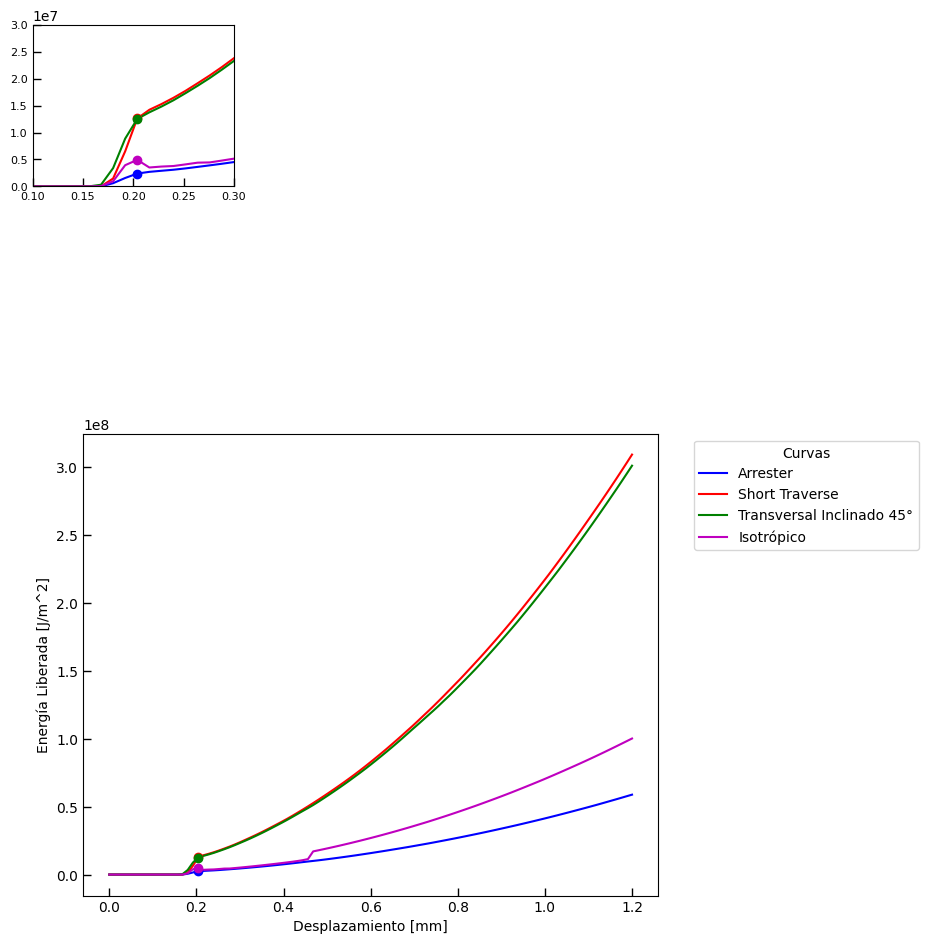

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Lee los archivos Excel
df_arrester = pd.read_excel('/content/database_modelo_arrester.xlsx')
df_short_traverse = pd.read_excel('/content/database_modelo_short_traverse.xlsx')
df_inclinado = pd.read_excel('/content/database_modelo_transversal_inclinado45.xlsx')
df_isotropico = pd.read_excel('/content/database_iso_final_homogeneo.xlsx')

# Crear la figura principal con espacio adicional para elementos fuera del gráfico
fig, ax = plt.subplots(figsize=(10, 6))
fig.subplots_adjust(right=0.7)  # Ajustar margen derecho para espacio adicional

# Graficar las curvas principales
curves = [
    (df_arrester, 'b', 'Arrester'),
    (df_short_traverse, 'r', 'Short Traverse'),
    (df_inclinado, 'g', 'Transversal Inclinado 45°'),
    (df_isotropico, 'm', 'Isotrópico')
]

for df, color, label in curves:
    ax.plot(df['Displacement (mm)'], df['J-integral (J/m^2)'], linestyle='-', color=color, label=label)

# Marcar el punto en desplazamiento 0.204 mm para cada curva (sin agregarlo a la leyenda)
for df, color, label in curves:
    index = df['Displacement (mm)'].sub(0.204).abs().idxmin()
    ax.plot(df['Displacement (mm)'][index], df['J-integral (J/m^2)'][index], marker='o', markersize=6, color=color, label=None)

# Configurar etiquetas del gráfico principal
ax.set_xlabel('Desplazamiento [mm]')
ax.set_ylabel('Energía Liberada [J/m^2]')
ax.grid(False)
plt.tick_params(direction='in', length=6, width=1, colors='k', grid_color='k',grid_alpha=0.5)
# Añadir la leyenda fuera del gráfico principal
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=10, frameon=True, title='Curvas')

# Crear un subgráfico fuera del gráfico principal
axins = inset_axes(ax, width="35%", height="35%", loc="upper left", bbox_to_anchor=(-0.1, 0.9, 1, 1), bbox_transform=ax.transAxes)

# Configurar límites del zoom en el subgráfico
zoom_range_x = (0.1, 0.3)  # Ajustar el rango del eje x para el zoom
zoom_range_y = (0, 0.3e8)  # Ajustar el rango del eje y para el zoom
axins.set_xlim(zoom_range_x)
axins.set_ylim(zoom_range_y)

# Graficar las curvas en el subgráfico
for df, color, label in curves:
    axins.plot(df['Displacement (mm)'], df['J-integral (J/m^2)'], linestyle='-', color=color)

# Marcar el punto en el subgráfico (sin agregarlo a la leyenda)
for df, color, label in curves:
    index = df['Displacement (mm)'].sub(0.204).abs().idxmin()
    axins.plot(df['Displacement (mm)'][index], df['J-integral (J/m^2)'][index], marker='o', markersize=6, color=color, label=None)

# Configurar el subgráfico
axins.tick_params(axis='both', which='both', labelsize=8)
axins.grid(False)
plt.tick_params(direction='in', length=6, width=1, colors='k', grid_color='k',grid_alpha=0.5)
# Mostrar el gráfico completo
plt.show()

